In [80]:

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

years = [1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965]
rice_production = [-39.69, -7.51, -44.61, 0, -32.53, -43.36, -59.23, -76.33, -85.63, -23.83, -30.49, -29.0]
positive_rice_production = [(val + 100.0) * 3 for val in rice_production]

def system(t, y, Eh, *params):
  S, L, G = y

  a1, a2, b1, b5, c1, c2, c3 = params

  #Sparrows live 3 years on average
  a3 = 1/3

  #Locusts die and lay new eggs every year
  b4 = 1

  #Locusts multiply about 15% faster while gregarious
  b2 = 0.15 * b1

  #To make the locusts swarms turn on quickly
  b3 = 0.01



  def f(L):
    return b1 + (b2 * L**2) / (b3**2 + L**2)

  dS = (a1 * S * L) + (a2 * G * S) - (a3 * S) - (Eh * S)
  dL = f(L) * L - (b4 * L) - (b5 * S * L)
  dG = 1 - (c1 * G * S) - (c2 * G * L) - (c3 * G)

  return [dS, dL, dG]

#         a1,    a2,   b1,   b5,    c1,    c2,    c3
params = [0.001, 0.00, 1.50, 0.005, 0.001, 0.005, 0.05]

S0 = 10
L0 = 100
G0 = positive_rice_production[0]




t_span = (0, 12)
t_eval = np.linspace(0, 12, 100)


def run_simulation(Eh=0.0, S0=S0, L0=L0, G0=G0):
  """Simulate and optionally plot the system for given hunting/farming efforts."""
  y0 = [S0, L0, G0]
  sol = solve_ivp(system, t_span, y0, t_eval=t_eval, args=(Eh, *params))
  print(params)
  plt.figure(figsize=(8,5))
  plt.plot(sol.t, sol.y[0], label=f'Sparrows')
  plt.plot(sol.t, sol.y[1], label=f'Locusts')
  plt.plot(sol.t, sol.y[2], label=f'Grain')
  # plt.plot(sol.t, positive_rice_production, label=f'Chicago Rice Data')
  plt.xlabel('Time (years)')
  plt.ylabel('Individuals / Index')
  plt.title(f'Simulation: Eh={Eh}')
  plt.legend()
  plt.grid(True)
  plt.show()

  print("Year |   S (sparrows)   |   L (locusts)   |   G (grain)")
  print("-" * 52)
  for year, S, L, G in zip(years, *sol.y):
    print(f"{year:<5} | {S:>15.3f} | {L:>15.3f} | {G:>15.3f}")


def findSteadyState(dt, tol):
  S0 = 10
  L0 = 100
  G0 = positive_rice_production[0]
  iters = 0
  while iters < 10000:
    iters += 1
    dS, dL, dG = system(0, [S0, L0, G0], 0.0, *params)
    if dS < tol and dL < tol and dG < tol:
      return S0, L0, G0
    S0 += dS * dt
    L0 += dL * dt
    G0 += dG * dt
  return S0, L0, G0
  # return None

# S0, L0, G0 = findSteadyState(0.001, 0.005)
# ratio = G0 / positive_rice_production[0]
# S0, L0, G0 = S0 * ratio, L0 * ratio, G0 * ratio



--- Simulation 1 with params [6.66833827e-03 8.43236524e-04 1.52053579e+00 4.07698044e-03
 4.57964231e-03 8.82854254e-03 4.67817512e-02] ---
[6.66833827e-03 8.43236524e-04 1.52053579e+00 4.07698044e-03
 4.57964231e-03 8.82854254e-03 4.67817512e-02]


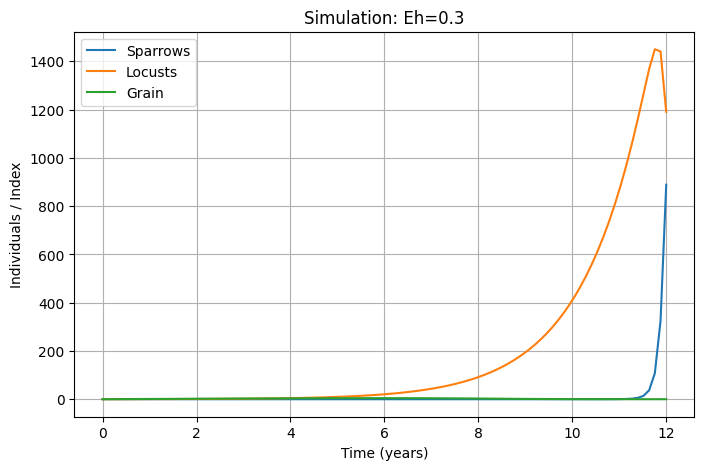

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |           0.235 |           0.230 |           0.105
1955  |           0.218 |           0.252 |           0.225
1956  |           0.202 |           0.276 |           0.345
1957  |           0.187 |           0.302 |           0.463
1958  |           0.173 |           0.331 |           0.581
1959  |           0.160 |           0.362 |           0.699
1960  |           0.149 |           0.397 |           0.815
1961  |           0.138 |           0.434 |           0.931
1962  |           0.127 |           0.476 |           1.046
1963  |           0.118 |           0.521 |           1.160
1964  |           0.109 |           0.570 |           1.274
1965  |           0.101 |           0.624 |           1.387

--- Simulation 2 with params [0.00888642 0.00295879 1.28430216 0.00368544 0.00554775 0.00405584
 0.01648559] ---
[0.00888642 0.00295879 1.28430216 0.00368544 0.00554775 0

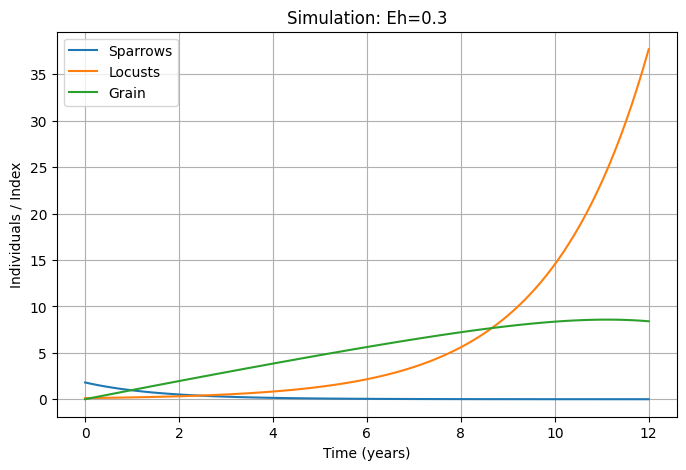

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |           1.806 |           0.125 |           0.002
1955  |           1.673 |           0.132 |           0.123
1956  |           1.550 |           0.140 |           0.244
1957  |           1.435 |           0.148 |           0.364
1958  |           1.330 |           0.157 |           0.484
1959  |           1.232 |           0.166 |           0.604
1960  |           1.141 |           0.176 |           0.723
1961  |           1.057 |           0.186 |           0.842
1962  |           0.979 |           0.197 |           0.961
1963  |           0.907 |           0.209 |           1.079
1964  |           0.840 |           0.221 |           1.197
1965  |           0.779 |           0.234 |           1.315

--- Simulation 3 with params [2.37358775e-03 1.04502321e-03 1.45920268e+00 3.70013290e-03
 2.62138450e-03 9.67813467e-03 8.41336103e-02] ---
[2.37358775e-03 1.04502321e-0

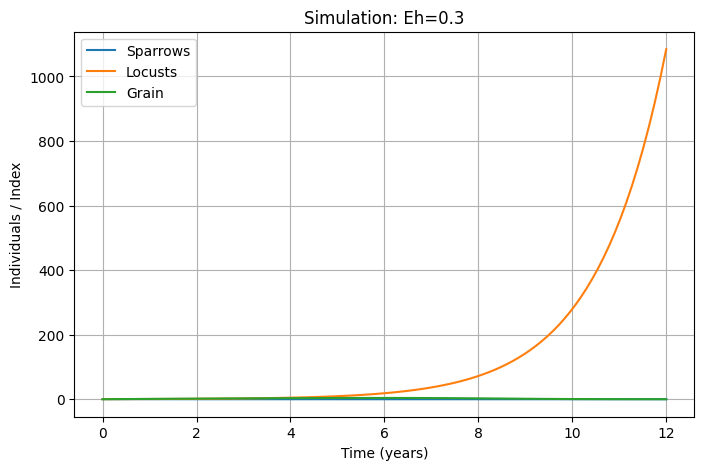

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |           0.318 |           0.318 |           0.072
1955  |           0.294 |           0.345 |           0.192
1956  |           0.273 |           0.374 |           0.311
1957  |           0.253 |           0.406 |           0.428
1958  |           0.234 |           0.441 |           0.544
1959  |           0.217 |           0.479 |           0.659
1960  |           0.201 |           0.520 |           0.772
1961  |           0.186 |           0.564 |           0.884
1962  |           0.172 |           0.613 |           0.995
1963  |           0.160 |           0.665 |           1.105
1964  |           0.148 |           0.722 |           1.213
1965  |           0.137 |           0.784 |           1.320

--- Simulation 4 with params [4.66810822e-03 9.56534886e-03 1.87155779e+00 6.77437587e-03
 1.72617201e-03 8.01351932e-03 9.10966192e-02] ---
[4.66810822e-03 9.56534886e-0

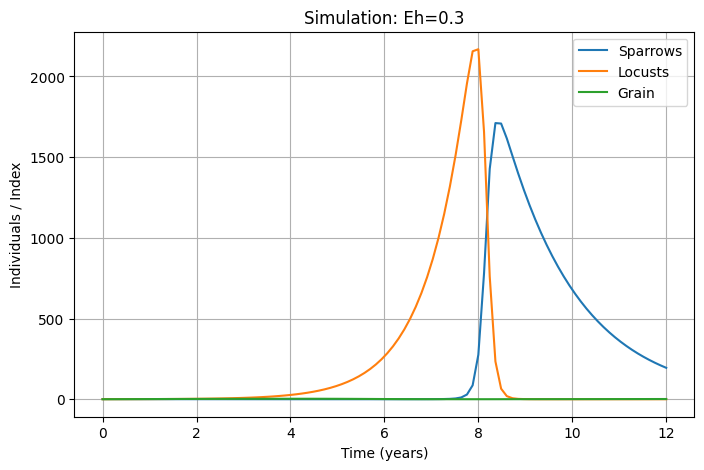

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |           1.052 |           0.267 |           0.001
1955  |           0.974 |           0.307 |           0.122
1956  |           0.902 |           0.353 |           0.241
1957  |           0.836 |           0.405 |           0.358
1958  |           0.775 |           0.466 |           0.475
1959  |           0.718 |           0.535 |           0.590
1960  |           0.666 |           0.615 |           0.703
1961  |           0.618 |           0.707 |           0.816
1962  |           0.573 |           0.812 |           0.926
1963  |           0.531 |           0.934 |           1.036
1964  |           0.493 |           1.073 |           1.144
1965  |           0.457 |           1.234 |           1.250

--- Simulation 5 with params [6.12806146e-03 1.29652842e-04 1.11201980e+00 7.76147685e-03
 3.69715143e-03 1.93830512e-03 3.72838314e-02] ---
[6.12806146e-03 1.29652842e-0

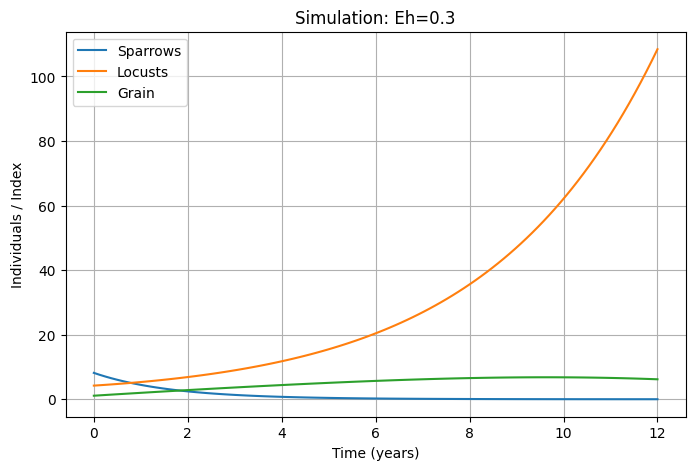

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |           8.200 |           4.257 |           1.129
1955  |           7.618 |           4.371 |           1.239
1956  |           7.079 |           4.490 |           1.349
1957  |           6.578 |           4.614 |           1.458
1958  |           6.113 |           4.745 |           1.566
1959  |           5.681 |           4.881 |           1.674
1960  |           5.281 |           5.022 |           1.781
1961  |           4.910 |           5.170 |           1.888
1962  |           4.565 |           5.324 |           1.994
1963  |           4.245 |           5.484 |           2.099
1964  |           3.948 |           5.651 |           2.204
1965  |           3.672 |           5.825 |           2.308

--- Simulation 6 with params [7.34726859e-03 4.59648070e-03 2.47601045e+00 1.95245319e-03
 5.88782531e-03 6.57391409e-03 1.02963329e-02] ---
[7.34726859e-03 4.59648070e-0

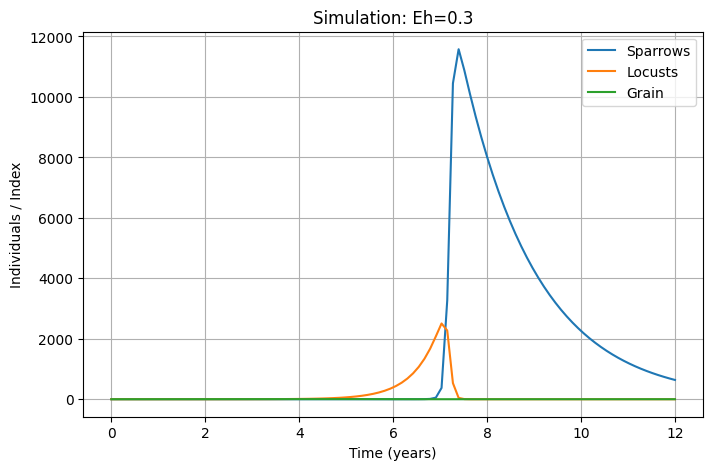

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |           0.931 |           0.007 |           0.000
1955  |           0.862 |           0.008 |           0.121
1956  |           0.798 |           0.010 |           0.242
1957  |           0.739 |           0.012 |           0.363
1958  |           0.685 |           0.015 |           0.483
1959  |           0.635 |           0.019 |           0.603
1960  |           0.588 |           0.023 |           0.723
1961  |           0.545 |           0.029 |           0.843
1962  |           0.505 |           0.036 |           0.963
1963  |           0.468 |           0.045 |           1.083
1964  |           0.433 |           0.057 |           1.202
1965  |           0.402 |           0.071 |           1.321

--- Simulation 7 with params [0.00142351 0.00168233 1.36636124 0.00273788 0.00436058 0.00475799
 0.08877917] ---
[0.00142351 0.00168233 1.36636124 0.00273788 0.00436058 0

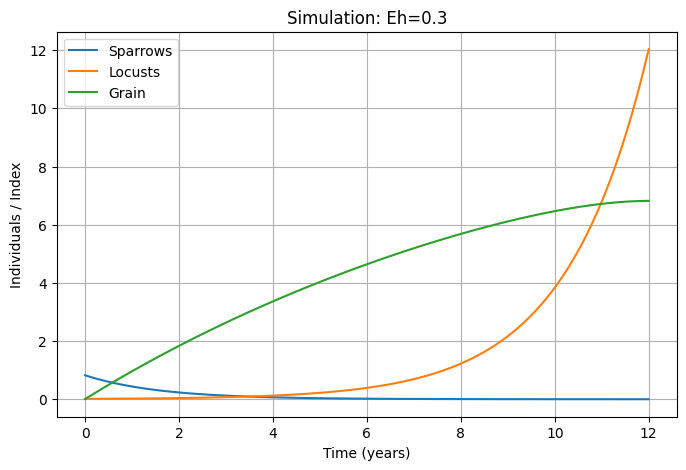

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |           0.824 |           0.014 |           0.006
1955  |           0.763 |           0.015 |           0.127
1956  |           0.706 |           0.016 |           0.246
1957  |           0.654 |           0.017 |           0.364
1958  |           0.606 |           0.018 |           0.480
1959  |           0.561 |           0.019 |           0.595
1960  |           0.520 |           0.020 |           0.709
1961  |           0.481 |           0.021 |           0.822
1962  |           0.446 |           0.023 |           0.934
1963  |           0.413 |           0.024 |           1.044
1964  |           0.383 |           0.026 |           1.153
1965  |           0.355 |           0.028 |           1.261

--- Simulation 8 with params [0.00354983 0.00310682 2.23993926 0.00849026 0.00332598 0.00922032
 0.03573474] ---
[0.00354983 0.00310682 2.23993926 0.00849026 0.00332598 0

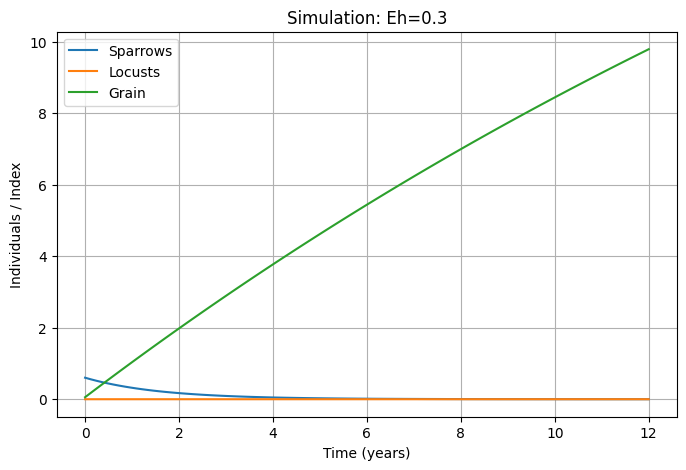

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |           0.602 |           0.000 |           0.057
1955  |           0.557 |           0.000 |           0.177
1956  |           0.516 |           0.000 |           0.297
1957  |           0.478 |           0.000 |           0.417
1958  |           0.443 |           0.000 |           0.536
1959  |           0.410 |           0.000 |           0.655
1960  |           0.380 |           0.000 |           0.773
1961  |           0.352 |           0.000 |           0.890
1962  |           0.326 |           0.000 |           1.007
1963  |           0.302 |           0.000 |           1.123
1964  |           0.280 |           0.000 |           1.239
1965  |           0.259 |           0.000 |           1.355

--- Simulation 9 with params [4.38253917e-04 3.59133735e-03 1.98710584e+00 8.02823955e-03
 7.81716799e-03 1.84078060e-03 2.82731602e-02] ---
[4.38253917e-04 3.59133735e-0

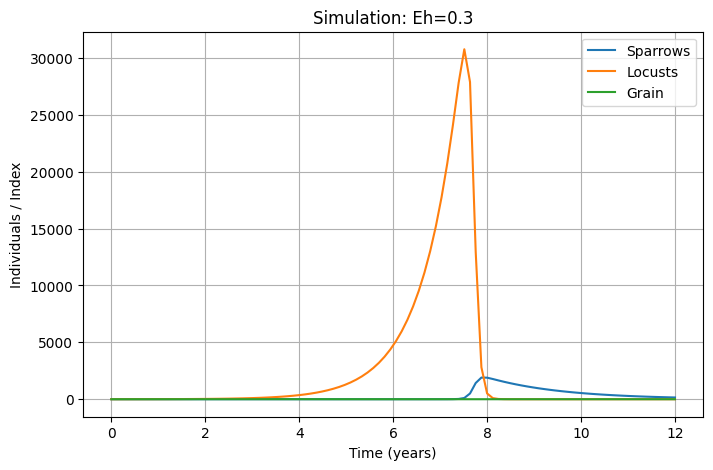

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |           0.166 |           2.123 |           0.000
1955  |           0.154 |           2.481 |           0.121
1956  |           0.143 |           2.899 |           0.241
1957  |           0.132 |           3.387 |           0.361
1958  |           0.122 |           3.957 |           0.481
1959  |           0.113 |           4.623 |           0.600
1960  |           0.105 |           5.402 |           0.718
1961  |           0.097 |           6.312 |           0.835
1962  |           0.090 |           7.376 |           0.952
1963  |           0.084 |           8.620 |           1.068
1964  |           0.078 |          10.073 |           1.183
1965  |           0.072 |          11.769 |           1.296

--- Simulation 10 with params [0.00692899 0.00626776 0.78383411 0.00298987 0.00129558 0.00724131
 0.05091612] ---
[0.00692899 0.00626776 0.78383411 0.00298987 0.00129558 

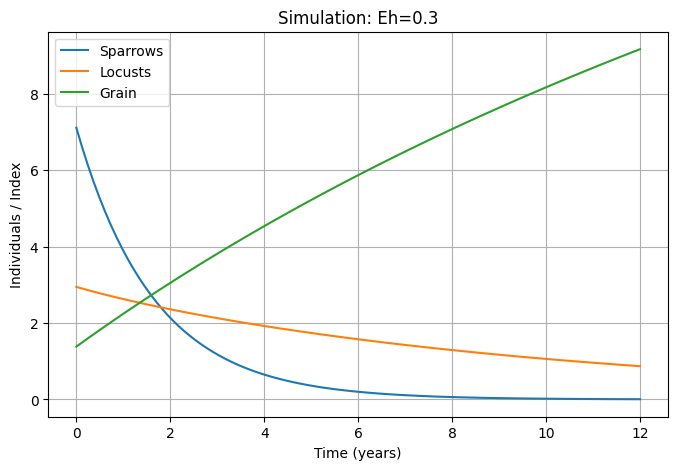

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |           7.108 |           2.945 |           1.383
1955  |           6.606 |           2.903 |           1.490
1956  |           6.140 |           2.861 |           1.596
1957  |           5.707 |           2.821 |           1.701
1958  |           5.304 |           2.782 |           1.806
1959  |           4.931 |           2.744 |           1.910
1960  |           4.584 |           2.707 |           2.013
1961  |           4.261 |           2.670 |           2.115
1962  |           3.962 |           2.635 |           2.216
1963  |           3.684 |           2.600 |           2.317
1964  |           3.425 |           2.566 |           2.417
1965  |           3.185 |           2.532 |           2.516

--- Simulation 11 with params [0.00853722 0.00203189 1.76219798 0.00180414 0.00935048 0.00596545
 0.07051732] ---
[0.00853722 0.00203189 1.76219798 0.00180414 0.00935048 

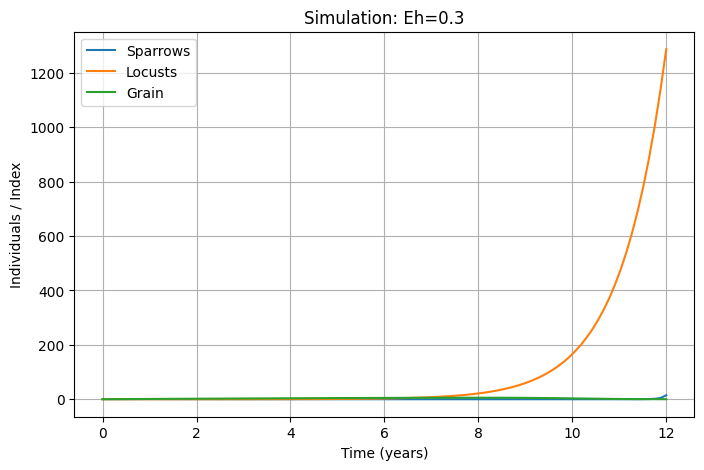

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |           0.586 |           0.007 |           0.000
1955  |           0.542 |           0.008 |           0.121
1956  |           0.502 |           0.008 |           0.240
1957  |           0.465 |           0.009 |           0.359
1958  |           0.431 |           0.010 |           0.476
1959  |           0.399 |           0.012 |           0.593
1960  |           0.370 |           0.013 |           0.708
1961  |           0.342 |           0.015 |           0.822
1962  |           0.317 |           0.016 |           0.936
1963  |           0.294 |           0.018 |           1.048
1964  |           0.272 |           0.021 |           1.159
1965  |           0.252 |           0.023 |           1.270

--- Simulation 12 with params [9.33904650e-03 6.37057751e-03 1.04456584e+00 2.30103320e-03
 9.52419513e-04 5.64266631e-03 5.92418213e-02] ---
[9.33904650e-03 6.37057751e-

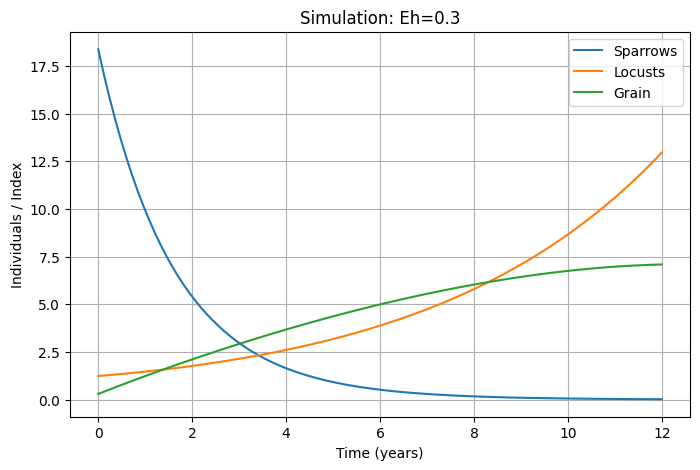

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |          18.377 |           1.242 |           0.298
1955  |          17.048 |           1.266 |           0.416
1956  |          15.817 |           1.291 |           0.532
1957  |          14.676 |           1.318 |           0.648
1958  |          13.619 |           1.345 |           0.762
1959  |          12.640 |           1.373 |           0.875
1960  |          11.733 |           1.402 |           0.988
1961  |          10.893 |           1.432 |           1.099
1962  |          10.113 |           1.463 |           1.209
1963  |           9.390 |           1.496 |           1.319
1964  |           8.719 |           1.529 |           1.427
1965  |           8.096 |           1.563 |           1.535

--- Simulation 13 with params [2.76514311e-03 3.70683940e-04 2.11101913e+00 5.95166642e-03
 8.64746421e-03 1.04699684e-03 3.23520665e-02] ---
[2.76514311e-03 3.70683940e-

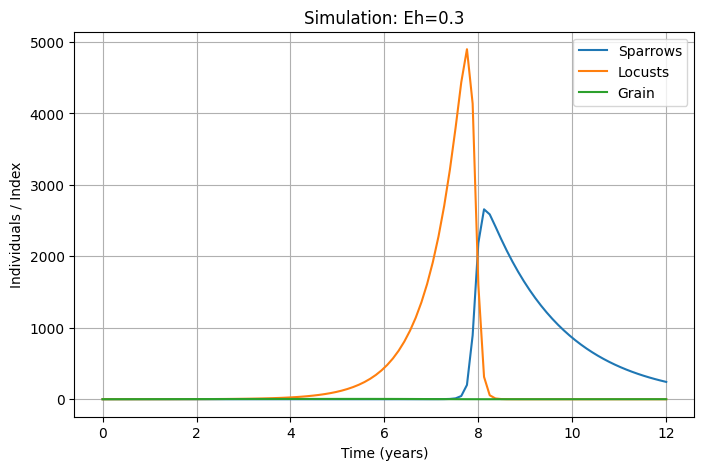

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |           0.852 |           0.085 |           0.000
1955  |           0.789 |           0.101 |           0.121
1956  |           0.731 |           0.120 |           0.241
1957  |           0.677 |           0.142 |           0.361
1958  |           0.627 |           0.169 |           0.480
1959  |           0.580 |           0.201 |           0.599
1960  |           0.538 |           0.239 |           0.717
1961  |           0.498 |           0.284 |           0.835
1962  |           0.461 |           0.337 |           0.952
1963  |           0.427 |           0.401 |           1.069
1964  |           0.396 |           0.476 |           1.185
1965  |           0.367 |           0.566 |           1.301

--- Simulation 14 with params [5.89244318e-03 1.55197987e-03 2.16758746e+00 9.48323997e-03
 7.25477796e-04 4.57434348e-03 2.18826067e-02] ---
[5.89244318e-03 1.55197987e-

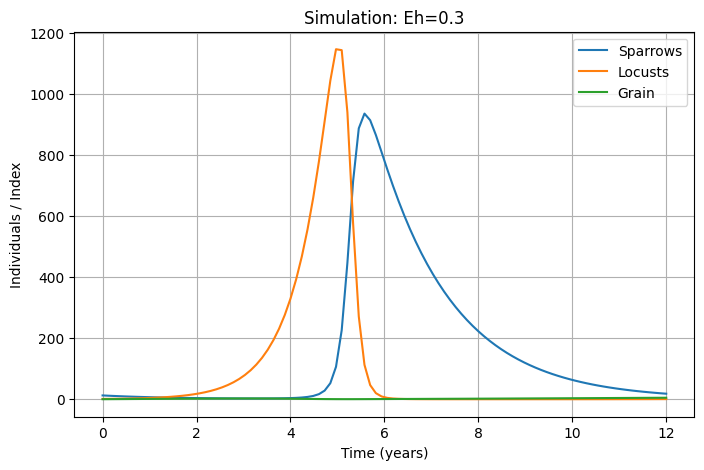

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |          12.447 |           1.018 |           0.065
1955  |          11.536 |           1.203 |           0.186
1956  |          10.694 |           1.423 |           0.306
1957  |           9.916 |           1.685 |           0.426
1958  |           9.196 |           1.997 |           0.545
1959  |           8.531 |           2.369 |           0.663
1960  |           7.916 |           2.812 |           0.781
1961  |           7.348 |           3.342 |           0.898
1962  |           6.824 |           3.972 |           1.014
1963  |           6.340 |           4.722 |           1.129
1964  |           5.895 |           5.617 |           1.243
1965  |           5.485 |           6.686 |           1.356

--- Simulation 15 with params [0.00425916 0.00870093 2.30945902 0.00326914 0.00618877 0.0082148
 0.09905346] ---
[0.00425916 0.00870093 2.30945902 0.00326914 0.00618877 0

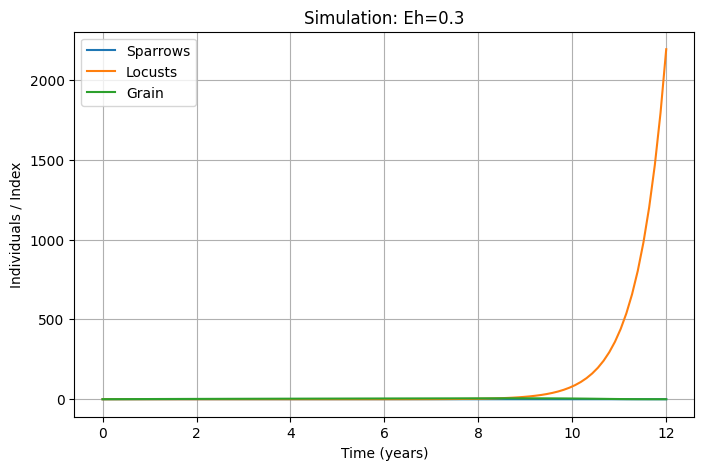

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |           0.056 |           0.000 |           0.199
1955  |           0.052 |           0.000 |           0.317
1956  |           0.048 |           0.000 |           0.434
1957  |           0.045 |           0.000 |           0.549
1958  |           0.042 |           0.000 |           0.663
1959  |           0.039 |           0.000 |           0.776
1960  |           0.036 |           0.000 |           0.887
1961  |           0.033 |           0.000 |           0.997
1962  |           0.031 |           0.000 |           1.105
1963  |           0.028 |           0.000 |           1.213
1964  |           0.026 |           0.000 |           1.319
1965  |           0.024 |           0.000 |           1.423

--- Simulation 16 with params [9.44462253e-04 7.52178476e-03 1.18782902e+00 4.62990235e-03
 6.62995219e-03 3.35408952e-03 1.46968261e-02] ---
[9.44462253e-04 7.52178476e-

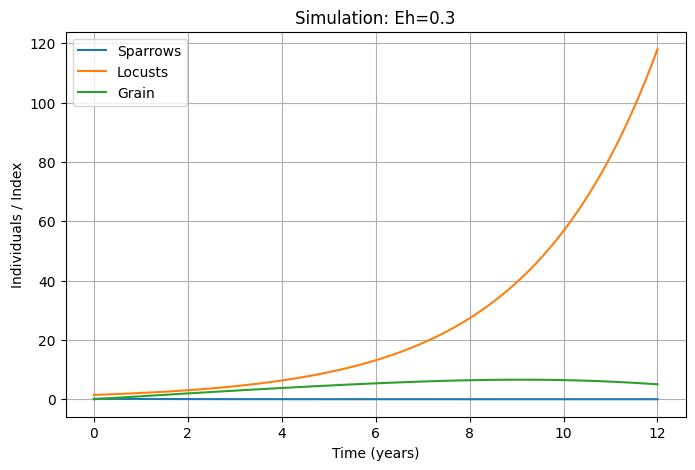

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |           0.173 |           1.462 |           0.004
1955  |           0.160 |           1.528 |           0.125
1956  |           0.148 |           1.597 |           0.245
1957  |           0.137 |           1.670 |           0.366
1958  |           0.127 |           1.745 |           0.486
1959  |           0.118 |           1.824 |           0.606
1960  |           0.109 |           1.907 |           0.725
1961  |           0.101 |           1.993 |           0.844
1962  |           0.094 |           2.084 |           0.963
1963  |           0.087 |           2.178 |           1.082
1964  |           0.081 |           2.277 |           1.200
1965  |           0.075 |           2.380 |           1.317

--- Simulation 17 with params [0.00828066 0.00682943 1.93415198 0.00639032 0.00299324 0.00308359
 0.07841693] ---
[0.00828066 0.00682943 1.93415198 0.00639032 0.00299324 

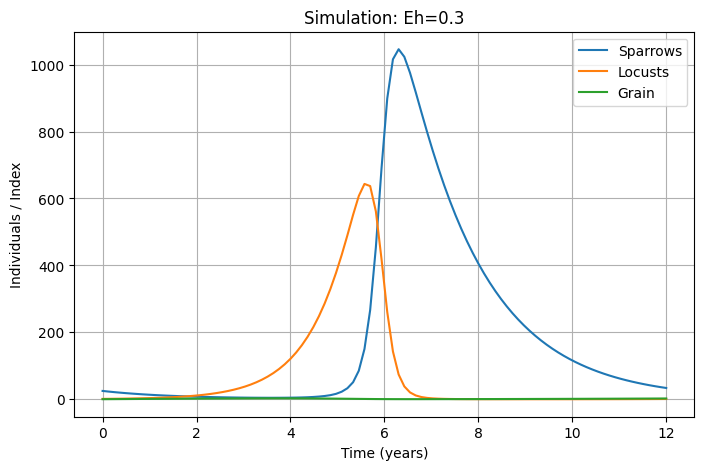

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |          24.893 |           1.164 |           0.200
1955  |          23.087 |           1.325 |           0.316
1956  |          21.418 |           1.511 |           0.431
1957  |          19.875 |           1.725 |           0.544
1958  |          18.450 |           1.971 |           0.654
1959  |          17.133 |           2.255 |           0.764
1960  |          15.916 |           2.582 |           0.872
1961  |          14.792 |           2.960 |           0.978
1962  |          13.755 |           3.396 |           1.083
1963  |          12.796 |           3.900 |           1.186
1964  |          11.912 |           4.481 |           1.288
1965  |          11.097 |           5.150 |           1.389

--- Simulation 18 with params [2.00714770e-03 9.96463827e-03 2.38980223e+00 1.16494224e-03
 6.97604831e-03 6.76946429e-03 9.43205731e-02] ---
[2.00714770e-03 9.96463827e-

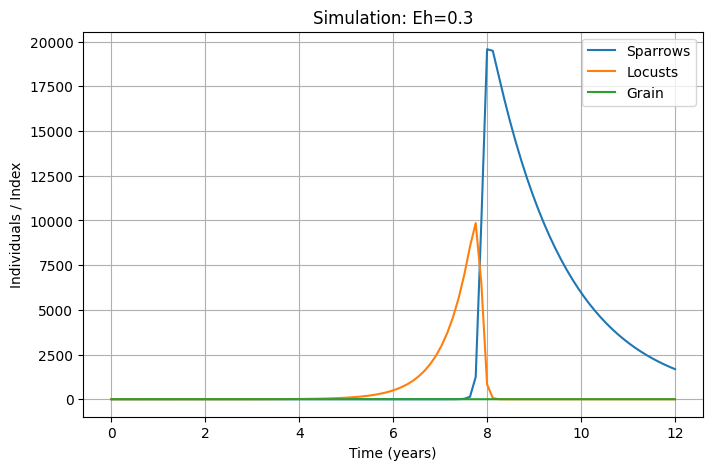

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |           0.776 |           0.014 |           0.000
1955  |           0.718 |           0.018 |           0.120
1956  |           0.665 |           0.022 |           0.240
1957  |           0.616 |           0.026 |           0.357
1958  |           0.571 |           0.033 |           0.473
1959  |           0.529 |           0.040 |           0.588
1960  |           0.491 |           0.049 |           0.702
1961  |           0.455 |           0.061 |           0.814
1962  |           0.422 |           0.075 |           0.925
1963  |           0.391 |           0.093 |           1.035
1964  |           0.363 |           0.115 |           1.143
1965  |           0.336 |           0.142 |           1.250

--- Simulation 19 with params [9.40963367e-03 7.92224514e-03 9.13631159e-01 9.96450257e-03
 3.68468217e-04 5.28806691e-03 2.44264383e-02] ---
[9.40963367e-03 7.92224514e-

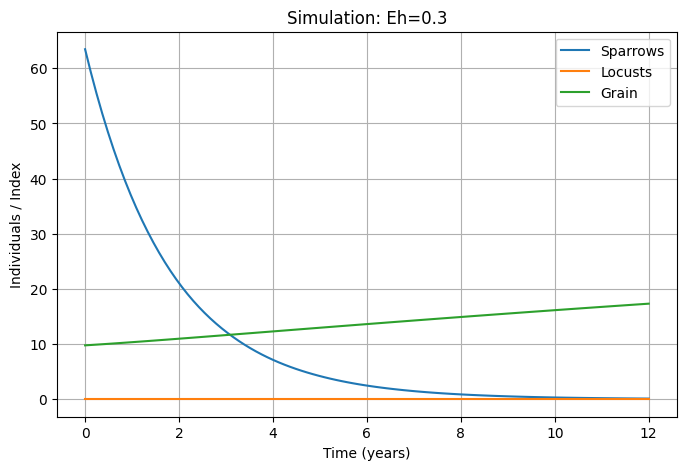

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |          63.449 |           0.000 |           9.766
1955  |          59.316 |           0.000 |           9.832
1956  |          55.455 |           0.000 |           9.898
1957  |          51.847 |           0.000 |           9.966
1958  |          48.478 |           0.000 |          10.036
1959  |          45.330 |           0.000 |          10.106
1960  |          42.391 |           0.000 |          10.177
1961  |          39.646 |           0.000 |          10.250
1962  |          37.083 |           0.000 |          10.323
1963  |          34.688 |           0.000 |          10.397
1964  |          32.450 |           0.000 |          10.471
1965  |          30.358 |           0.000 |          10.547

--- Simulation 20 with params [0.00339655 0.00367287 1.7894651  0.005443   0.0082298  0.00396867
 0.06285381] ---
[0.00339655 0.00367287 1.7894651  0.005443   0.0082298  

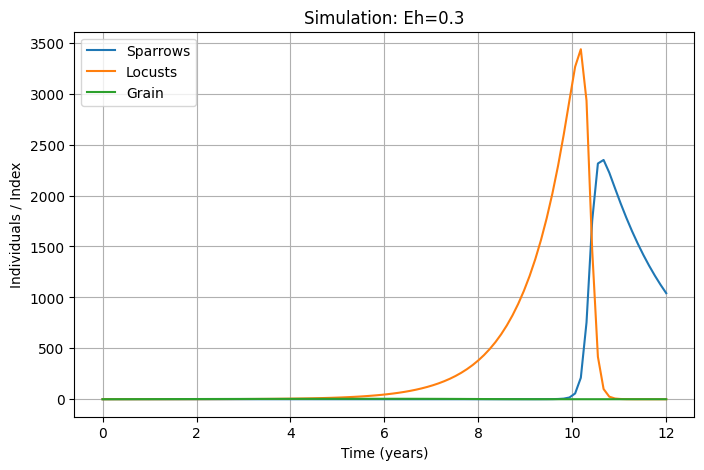

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |           0.623 |           0.081 |           0.000
1955  |           0.577 |           0.092 |           0.121
1956  |           0.534 |           0.105 |           0.241
1957  |           0.495 |           0.119 |           0.359
1958  |           0.458 |           0.135 |           0.477
1959  |           0.425 |           0.154 |           0.594
1960  |           0.393 |           0.175 |           0.710
1961  |           0.365 |           0.199 |           0.825
1962  |           0.338 |           0.226 |           0.939
1963  |           0.313 |           0.256 |           1.052
1964  |           0.290 |           0.291 |           1.164
1965  |           0.269 |           0.331 |           1.276

--- Simulation 21 with params [0.00473233 0.00532757 1.67476038 0.0085418  0.00868396 0.00775974
 0.0562326 ] ---
[0.00473233 0.00532757 1.67476038 0.0085418  0.00868396 

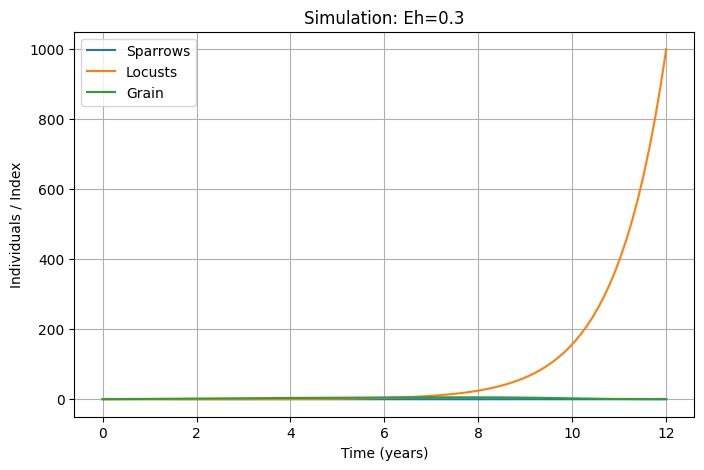

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |           0.412 |           0.016 |           0.008
1955  |           0.382 |           0.018 |           0.129
1956  |           0.354 |           0.019 |           0.248
1957  |           0.328 |           0.022 |           0.367
1958  |           0.304 |           0.024 |           0.486
1959  |           0.281 |           0.027 |           0.603
1960  |           0.261 |           0.030 |           0.719
1961  |           0.241 |           0.033 |           0.835
1962  |           0.224 |           0.037 |           0.950
1963  |           0.207 |           0.041 |           1.064
1964  |           0.192 |           0.046 |           1.177
1965  |           0.178 |           0.052 |           1.290

--- Simulation 22 with params [0.00140952 0.008311   1.01879219 0.0055612  0.00487595 0.00364099
 0.08679578] ---
[0.00140952 0.008311   1.01879219 0.0055612  0.00487595 

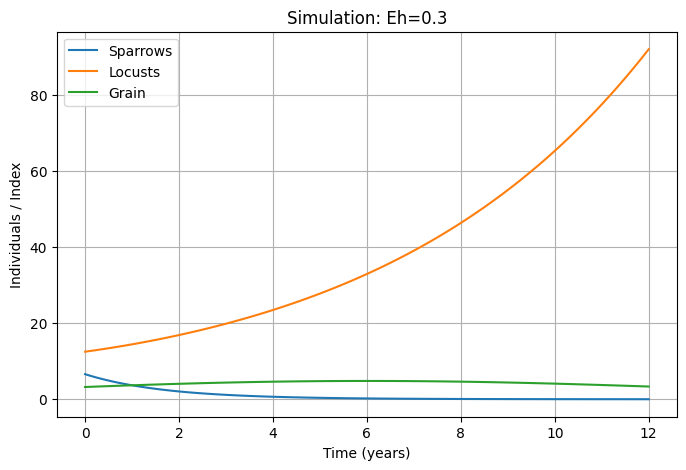

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |           6.585 |          12.494 |           3.219
1955  |           6.132 |          12.702 |           3.276
1956  |           5.710 |          12.917 |           3.332
1957  |           5.318 |          13.140 |           3.387
1958  |           4.952 |          13.369 |           3.442
1959  |           4.613 |          13.607 |           3.497
1960  |           4.297 |          13.851 |           3.550
1961  |           4.004 |          14.103 |           3.603
1962  |           3.731 |          14.362 |           3.655
1963  |           3.477 |          14.628 |           3.706
1964  |           3.240 |          14.902 |           3.756
1965  |           3.020 |          15.183 |           3.806

--- Simulation 23 with params [0.00782576 0.00711895 0.66719877 0.00745111 0.00396597 0.00506786
 0.05473305] ---
[0.00782576 0.00711895 0.66719877 0.00745111 0.00396597 

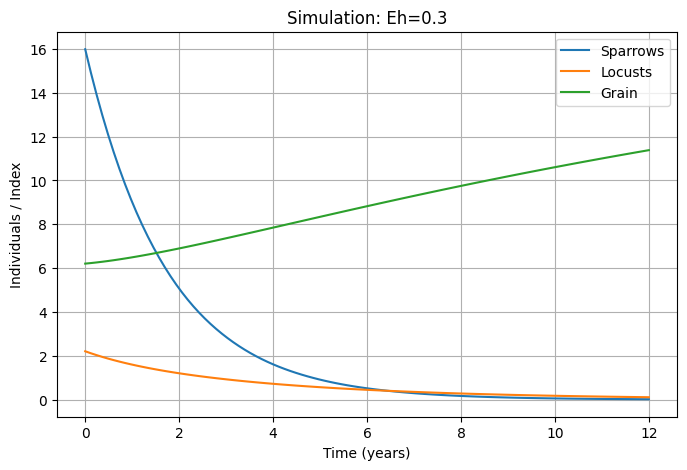

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |          15.990 |           2.206 |           6.206
1955  |          14.919 |           2.115 |           6.232
1956  |          13.918 |           2.030 |           6.260
1957  |          12.984 |           1.949 |           6.291
1958  |          12.111 |           1.874 |           6.325
1959  |          11.297 |           1.803 |           6.362
1960  |          10.538 |           1.735 |           6.400
1961  |           9.829 |           1.672 |           6.441
1962  |           9.169 |           1.611 |           6.483
1963  |           8.552 |           1.554 |           6.527
1964  |           7.977 |           1.500 |           6.573
1965  |           7.440 |           1.448 |           6.620

--- Simulation 24 with params [0.00505009 0.00249254 0.7406864  0.00919343 0.0093367  0.00636572
 0.04465649] ---
[0.00505009 0.00249254 0.7406864  0.00919343 0.0093367  

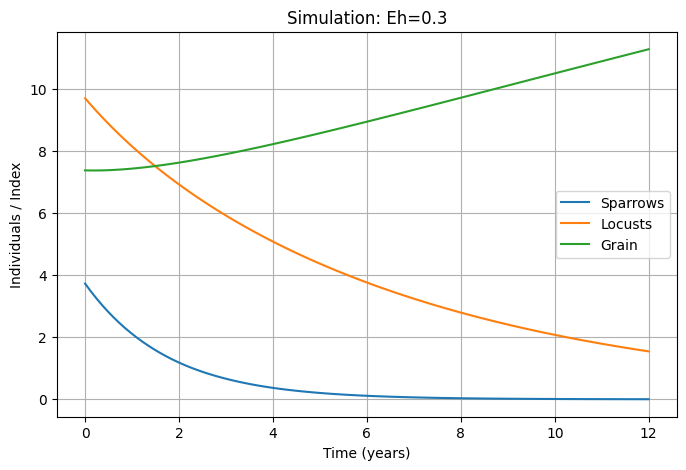

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |           3.726 |           9.694 |           7.371
1955  |           3.479 |           9.483 |           7.368
1956  |           3.248 |           9.279 |           7.368
1957  |           3.031 |           9.082 |           7.371
1958  |           2.829 |           8.892 |           7.377
1959  |           2.640 |           8.707 |           7.385
1960  |           2.463 |           8.527 |           7.396
1961  |           2.298 |           8.353 |           7.409
1962  |           2.144 |           8.184 |           7.424
1963  |           2.000 |           8.020 |           7.441
1964  |           1.866 |           7.861 |           7.460
1965  |           1.740 |           7.705 |           7.481

--- Simulation 25 with params [0.00981258 0.00491698 0.5059257  0.00144308 0.00989092 0.00748231
 0.06508884] ---
[0.00981258 0.00491698 0.5059257  0.00144308 0.00989092 

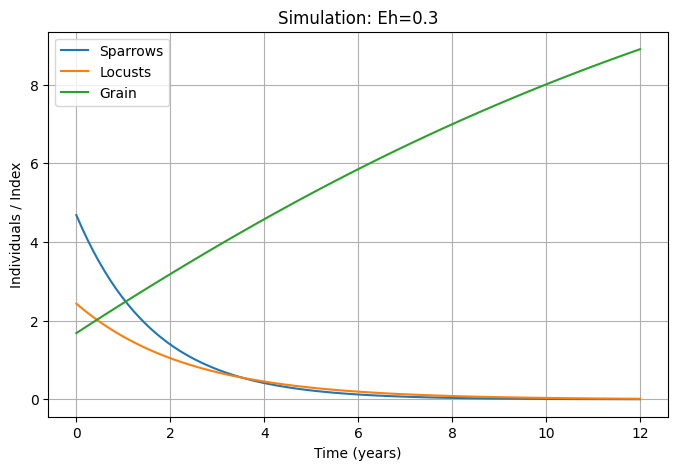

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |           4.683 |           2.433 |           1.683
1955  |           4.353 |           2.311 |           1.778
1956  |           4.047 |           2.195 |           1.871
1957  |           3.762 |           2.085 |           1.965
1958  |           3.496 |           1.981 |           2.058
1959  |           3.249 |           1.882 |           2.150
1960  |           3.020 |           1.788 |           2.242
1961  |           2.806 |           1.699 |           2.334
1962  |           2.608 |           1.614 |           2.425
1963  |           2.423 |           1.534 |           2.516
1964  |           2.252 |           1.457 |           2.606
1965  |           2.092 |           1.385 |           2.696

--- Simulation 26 with params [0.00402706 0.00596873 0.8731528  0.00498218 0.00509807 0.0025846
 0.02599435] ---
[0.00402706 0.00596873 0.8731528  0.00498218 0.00509807 0

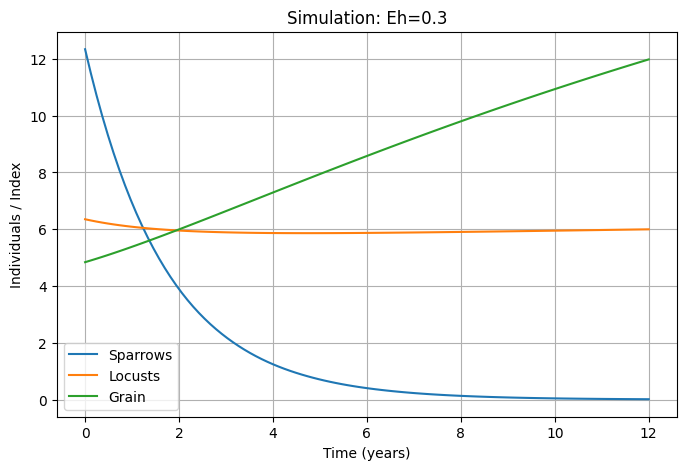

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |          12.340 |           6.353 |           4.841
1955  |          11.504 |           6.310 |           4.901
1956  |          10.725 |           6.271 |           4.963
1957  |           9.998 |           6.235 |           5.027
1958  |           9.321 |           6.202 |           5.092
1959  |           8.690 |           6.171 |           5.159
1960  |           8.103 |           6.143 |           5.227
1961  |           7.555 |           6.117 |           5.296
1962  |           7.045 |           6.094 |           5.366
1963  |           6.570 |           6.072 |           5.437
1964  |           6.127 |           6.052 |           5.510
1965  |           5.714 |           6.033 |           5.582

--- Simulation 27 with params [1.00484486e-04 4.10918692e-03 5.72253518e-01 7.04770895e-03
 2.27197898e-03 8.64144157e-03 7.94709226e-02] ---
[1.00484486e-04 4.10918692e-

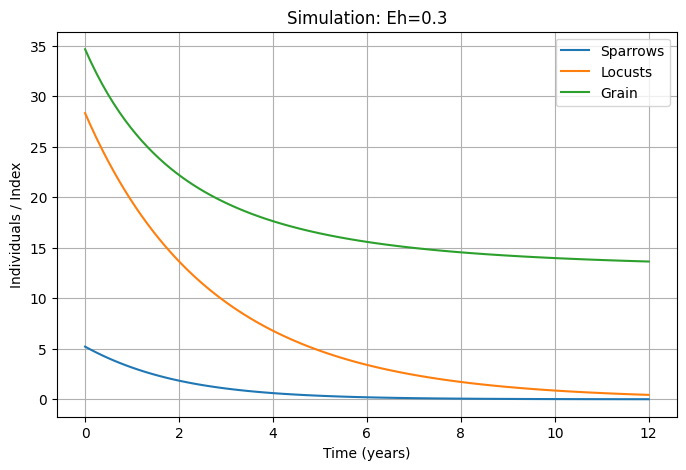

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |           5.209 |          28.314 |          34.633
1955  |           4.908 |          27.047 |          33.393
1956  |           4.622 |          25.844 |          32.246
1957  |           4.350 |          24.699 |          31.183
1958  |           4.092 |          23.611 |          30.196
1959  |           3.847 |          22.576 |          29.279
1960  |           3.615 |          21.591 |          28.426
1961  |           3.396 |          20.652 |          27.631
1962  |           3.189 |          19.759 |          26.889
1963  |           2.993 |          18.907 |          26.195
1964  |           2.808 |          18.094 |          25.546
1965  |           2.634 |          17.319 |          24.937

--- Simulation 28 with params [0.0055679  0.00842994 1.38392924 0.00449381 0.00761628 0.00232928
 0.06900195] ---
[0.0055679  0.00842994 1.38392924 0.00449381 0.00761628 

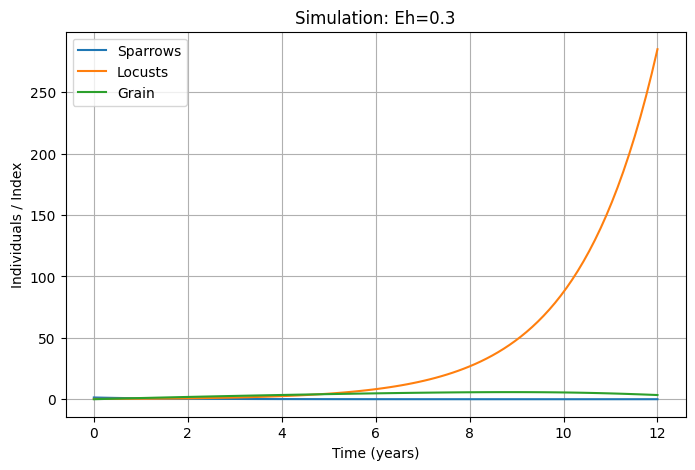

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |           1.425 |           0.238 |           0.003
1955  |           1.320 |           0.256 |           0.124
1956  |           1.222 |           0.274 |           0.243
1957  |           1.133 |           0.295 |           0.361
1958  |           1.050 |           0.316 |           0.479
1959  |           0.973 |           0.340 |           0.595
1960  |           0.902 |           0.365 |           0.710
1961  |           0.836 |           0.392 |           0.824
1962  |           0.775 |           0.421 |           0.937
1963  |           0.718 |           0.452 |           1.049
1964  |           0.666 |           0.485 |           1.160
1965  |           0.618 |           0.521 |           1.270

--- Simulation 29 with params [7.62699781e-03 9.20742125e-03 2.09772363e+00 6.67903137e-03
 7.15745731e-03 1.50326135e-03 7.32399499e-02] ---
[7.62699781e-03 9.20742125e-

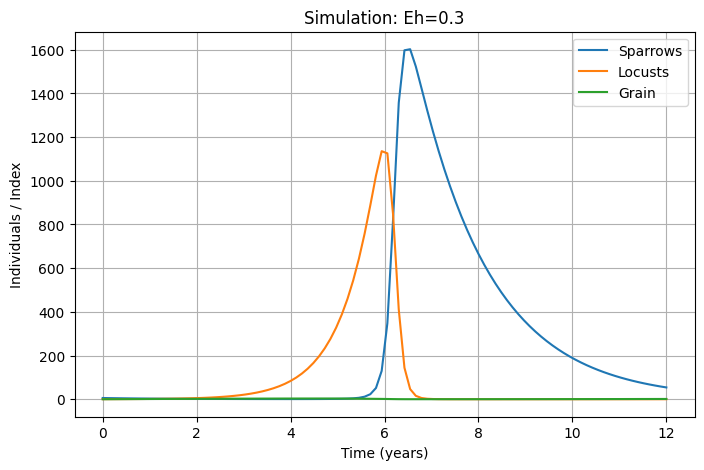

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |           5.572 |           0.312 |           0.010
1955  |           5.163 |           0.369 |           0.130
1956  |           4.784 |           0.436 |           0.249
1957  |           4.434 |           0.516 |           0.366
1958  |           4.110 |           0.610 |           0.482
1959  |           3.811 |           0.721 |           0.597
1960  |           3.535 |           0.854 |           0.710
1961  |           3.279 |           1.010 |           0.822
1962  |           3.043 |           1.196 |           0.933
1963  |           2.825 |           1.416 |           1.042
1964  |           2.623 |           1.677 |           1.151
1965  |           2.436 |           1.986 |           1.258

--- Simulation 30 with params [0.00247851 0.00562562 1.56720827 0.00891909 0.00199591 0.00972169
 0.04257999] ---
[0.00247851 0.00562562 1.56720827 0.00891909 0.00199591 

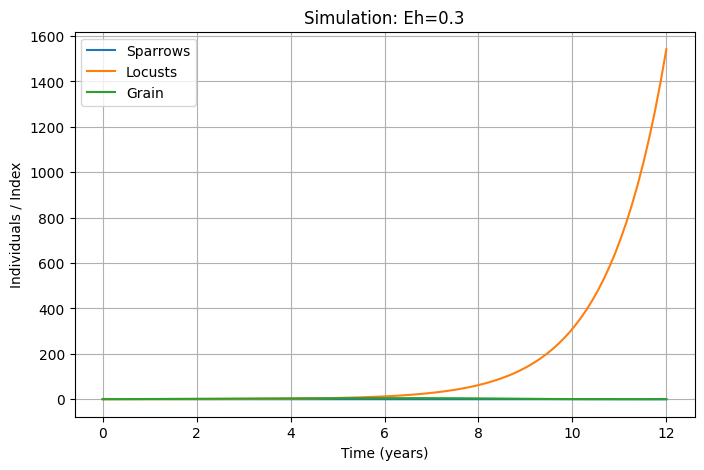

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |           0.935 |           0.103 |           0.023
1955  |           0.866 |           0.114 |           0.144
1956  |           0.802 |           0.125 |           0.264
1957  |           0.743 |           0.138 |           0.384
1958  |           0.688 |           0.152 |           0.503
1959  |           0.638 |           0.167 |           0.621
1960  |           0.591 |           0.184 |           0.738
1961  |           0.547 |           0.202 |           0.855
1962  |           0.507 |           0.223 |           0.971
1963  |           0.470 |           0.246 |           1.087
1964  |           0.436 |           0.270 |           1.201
1965  |           0.404 |           0.298 |           1.316


[array([6.66833827e-03, 8.43236524e-04, 1.52053579e+00, 4.07698044e-03,
        4.57964231e-03, 8.82854254e-03, 4.67817512e-02]),
 array([0.00888642, 0.00295879, 1.28430216, 0.00368544, 0.00554775,
        0.00405584, 0.01648559]),
 array([2.37358775e-03, 1.04502321e-03, 1.45920268e+00, 3.70013290e-03,
        2.62138450e-03, 9.67813467e-03, 8.41336103e-02]),
 array([4.66810822e-03, 9.56534886e-03, 1.87155779e+00, 6.77437587e-03,
        1.72617201e-03, 8.01351932e-03, 9.10966192e-02]),
 array([6.12806146e-03, 1.29652842e-04, 1.11201980e+00, 7.76147685e-03,
        3.69715143e-03, 1.93830512e-03, 3.72838314e-02]),
 array([7.34726859e-03, 4.59648070e-03, 2.47601045e+00, 1.95245319e-03,
        5.88782531e-03, 6.57391409e-03, 1.02963329e-02]),
 array([0.00142351, 0.00168233, 1.36636124, 0.00273788, 0.00436058,
        0.00475799, 0.08877917]),
 array([0.00354983, 0.00310682, 2.23993926, 0.00849026, 0.00332598,
        0.00922032, 0.03573474]),
 array([4.38253917e-04, 3.59133735e-03, 1.98

In [83]:
import numpy as np
from scipy.stats import qmc

def run_lhs_simulations(n_samples=20, Eh=0.0, param_bounds=None):
  #General approach of Latin hypercube sampling and sample inputs not original
  #Customized range, finding initial steady state before solving the equations
  #Also spent a lot of time dealing with weird behavior
    global params  # reuse the global params variable

    if param_bounds is None:
        # Default bounds for each parameter (a1, a2, b1, b5, c1, c2, c3)
        param_bounds = [
            (0.0001, 0.01),   # a1
            (0.0, 0.01),      # a2
            (0.5, 2.5),       # b1
            (0.001, 0.01),    # b5
            (0.0001, 0.01),   # c1
            (0.001, 0.01),    # c2
            (0.01, 0.1)       # c3
        ]

    # Create LHS sampler
    sampler = qmc.LatinHypercube(d=len(param_bounds))
    sample = sampler.random(n=n_samples)

    # Scale samples to parameter bounds
    l_bounds = [low for low, high in param_bounds]
    u_bounds = [high for low, high in param_bounds]
    scaled_samples = qmc.scale(sample, l_bounds, u_bounds)

    results = []
    for i, param_set in enumerate(scaled_samples):
        print(f"\n--- Simulation {i+1} with params {param_set} ---")
        params = param_set  # update global params
        steadyState = findSteadyState(0.001, 0.005)
        if steadyState is None:
            print("Steady state not found. Skipping this set of parameters.")
            continue
        S0, L0, G0 = findSteadyState(0.01, 0.005)
        ratio = G0 / positive_rice_production[0]
        S0, L0, G0 = S0 * ratio, L0 * ratio, G0 * ratio
        run_simulation(Eh=Eh, S0=S0, L0=L0, G0=G0)
        results.append(param_set)

    return results

run_lhs_simulations(n_samples = 30, Eh = 0.3)